**Atualizando a biblioteca para plotagem de gráficos**


In [1]:
!pip -q install plotly --upgrade
!pip -q install pandas numpy seaborn matplotlib plotly

**Importando bibliotecas**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pickle

**Abrindo um arquivo CSV do drive**

In [3]:
#base = pd.read_csv('/content/sample_data/restaurante_correto.csv', sep=',')

**Você também pode carregar seu arquivo e já selecionar as colunas que desejar... investigue esta função**

In [4]:
import pandas as pd

# Carregar os dados
train = pd.read_csv('train.csv', sep=',', usecols=['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked'])
test = pd.read_csv('test.csv', sep=',', usecols=['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked'])
gender_submission = pd.read_csv('gender_submission.csv', sep=',')

# Adicionar a coluna "Survived" ao test.csv com base no gender_submission
test = test.merge(gender_submission, on='PassengerId', how='left')

# Converter valores da coluna "Survived" para "sim" e "não"
train["Survived"] = train["Survived"].replace({0: "não", 1: "sim"})
test["Survived"] = test["Survived"].replace({0: "não", 1: "sim"})

# Removendo a coluna PassengerId do test após o merge
test = test.drop(columns=['PassengerId'])

# Concatenar as bases train e test
base = pd.concat([train, test], ignore_index=True)

# Salvar a base consolidada
#base.to_csv("base.csv", index=False)

#print(base.head())  # Exibe as primeiras linhas para conferir

#base2 = pd.read_csv('/content/sample_data/restaurante_correto.csv', ';', usecols=['Alternativo', 'Bar'])
#base2

In [5]:
base

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,não,3,male,22.0,1,0,7.2500,NaN,S
1,sim,1,female,38.0,1,0,71.2833,C85,C
2,sim,3,female,26.0,0,0,7.9250,NaN,S
3,sim,1,female,35.0,1,0,53.1000,C123,S
4,não,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
1304,não,3,male,NaN,0,0,8.0500,NaN,S
1305,sim,1,female,39.0,0,0,108.9000,C105,C
1306,não,3,male,38.5,0,0,7.2500,NaN,S
1307,não,3,male,NaN,0,0,8.0500,NaN,S


In [6]:
base.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,não,3,male,22.0,1,0,7.2500,NaN,S
1,sim,1,female,38.0,1,0,71.2833,C85,C
2,sim,3,female,26.0,0,0,7.9250,NaN,S


In [7]:
base.tail(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
1307,não,3,male,NaN,0,0,8.0500,NaN,S
1308,não,3,male,NaN,1,1,22.3583,NaN,C


**Contando quantidade de instâncias**


In [8]:
Sobreviveu = base.columns[0]
np.unique(base[Sobreviveu], return_counts=True)

(array(['não', 'sim'], dtype=object), array([815, 494]))

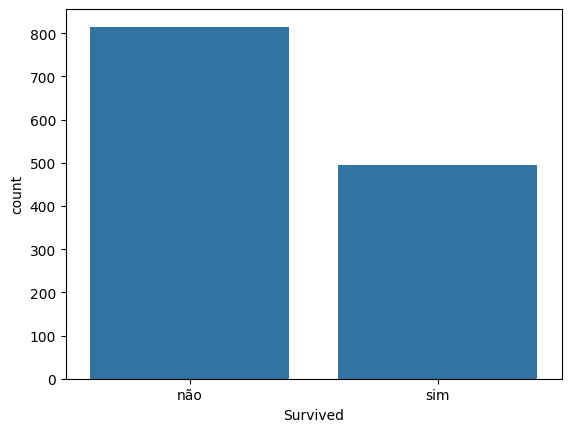

In [9]:
sns.countplot(x = base[Sobreviveu]);
#sns.countplot(x = base[Classificacao]);

**Tratamento de dados categóricos**

> *LabelEncoder - Vamos tratar os dados categóricos colocando 1, 2, 3 e etc**



In [10]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
#transformando todos atributos em dados numéricos ordinais
#base_encoded = base.apply(LabelEncoder().fit_transform)
cols_label_encode = ['Cabin', 'Embarked', 'Sex']
base[cols_label_encode] = base[cols_label_encode].apply(LabelEncoder().fit_transform)

In [11]:
base

{'train':      PassengerId  Survived  Pclass  Name  Sex   Age  SibSp  Parch  Ticket  \
 0              1         0       3   108    1  22.0      1      0     523   
 1              2         1       1   190    0  38.0      1      0     596   
 2              3         1       3   353    0  26.0      0      0     669   
 3              4         1       1   272    0  35.0      1      0      49   
 4              5         0       3    15    1  35.0      0      0     472   
 ..           ...       ...     ...   ...  ...   ...    ...    ...     ...   
 886          887         0       2   548    1  27.0      0      0     101   
 887          888         1       1   303    0  19.0      0      0      14   
 888          889         0       3   413    0   NaN      1      2     675   
 889          890         1       1    81    1  26.0      0      0       8   
 890          891         0       3   220    1  32.0      0      0     466   
 
         Fare  Cabin  Embarked  
 0     7.2500    147



>** OneHotEncoder - Agora vamos binarizar atributos não ordinais**

**Contando quantas opções de resposta tem cada atributo**

In [ ]:
len(np.unique(base['Sex'])) # = 2

2

In [14]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [15]:
cols_onehot_encode = []
# Inicializar o OneHotEncoder (sparse_output=False retorna um array denso)
onehot = OneHotEncoder(sparse_output=False)

# Aplicar o OneHotEncoder apenas nas colunas categóricas
df_onehot = onehot.fit_transform(base[cols_onehot_encode])

# Obter os novos nomes das colunas após a codificação
nomes_das_colunas = onehot.get_feature_names_out(cols_onehot_encode)

# Criar um DataFrame com os dados codificados e as novas colunas
df_onehot = pd.DataFrame(df_onehot, columns=nomes_das_colunas)

# Combinar as colunas codificadas com as colunas que não foram transformadas
base_encoded= pd.concat([df_onehot, base.drop(columns=cols_onehot_encode)], axis=1)


In [15]:
base_encoded

,Embarked_0,Embarked_1,Embarked_2,Embarked_3,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
0,0.0,0.0,1.0,0.0,1,0,3,108,1,22.0,1,0,523,7.2500,147
1,1.0,0.0,0.0,0.0,2,1,1,190,0,38.0,1,0,596,71.2833,81
2,0.0,0.0,1.0,0.0,3,1,3,353,0,26.0,0,0,669,7.9250,147
3,0.0,0.0,1.0,0.0,4,1,1,272,0,35.0,1,0,49,53.1000,55
4,0.0,0.0,1.0,0.0,5,0,3,15,1,35.0,0,0,472,8.0500,147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,0.0,1.0,0.0,887,0,2,548,1,27.0,0,0,101,13.0000,147
887,0.0,0.0,1.0,0.0,888,1,1,303,0,19.0,0,0,14,30.0000,30
888,0.0,0.0,1.0,0.0,889,0,3,413,0,NaN,1,2,675,23.4500,147
889,1.0,0.0,0.0,0.0,890,1,1,81,1,26.0,0,0,8,30.0000,60


In [16]:
base_encoded.shape

(891, 15)

**Separar o dataset em variáveis independentes (X_prev) e dependentes (y_classe)**

In [ ]:
# Supondo que a última coluna seja o target
X_prev = base_encoded.drop(base_encoded.columns[0], axis=1)
y_classe = base_encoded.iloc[:, 0]

**Método de amostragem Holdout**

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_prev

,Embarked_0,Embarked_1,Embarked_2,Embarked_3,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,0.0,0.0,1.0,0.0,1,0,3,108,1,22.0,1,0,523,7.2500
1,1.0,0.0,0.0,0.0,2,1,1,190,0,38.0,1,0,596,71.2833
2,0.0,0.0,1.0,0.0,3,1,3,353,0,26.0,0,0,669,7.9250
3,0.0,0.0,1.0,0.0,4,1,1,272,0,35.0,1,0,49,53.1000
4,0.0,0.0,1.0,0.0,5,0,3,15,1,35.0,0,0,472,8.0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,0.0,1.0,0.0,887,0,2,548,1,27.0,0,0,101,13.0000
887,0.0,0.0,1.0,0.0,888,1,1,303,0,19.0,0,0,14,30.0000
888,0.0,0.0,1.0,0.0,889,0,3,413,0,NaN,1,2,675,23.4500
889,1.0,0.0,0.0,0.0,890,1,1,81,1,26.0,0,0,8,30.0000


In [20]:
y_classe

0      147
1       81
2      147
3       55
4      147
      ... 
886    147
887     30
888    147
889     60
890    147
Name: Cabin, Length: 891, dtype: int64

In [21]:
y_classe.shape

(891,)

In [22]:
#X_train_ds, X_test_ds, y_train_ds, y_test_ds = train_test_split(X, y, test_size=0.3, random_state=123, shuffle=True, stratify=y)
X_treino, X_teste, y_treino, y_teste = train_test_split(X_prev, y_classe, test_size = 0.20, random_state = 42)

In [23]:
X_treino.shape

(712, 14)

In [24]:
X_teste.shape

(179, 14)

In [25]:
X_teste

,Embarked_0,Embarked_1,Embarked_2,Embarked_3,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
709,1.0,0.0,0.0,0.0,710,1,3,561,1,NaN,1,1,189,15.2458
439,0.0,0.0,1.0,0.0,440,0,2,447,1,31.0,0,0,547,10.5000
840,0.0,0.0,1.0,0.0,841,0,3,11,1,20.0,0,0,647,7.9250
720,0.0,0.0,1.0,0.0,721,1,2,331,0,6.0,0,1,155,33.0000
39,1.0,0.0,0.0,0.0,40,1,3,589,0,14.0,1,0,186,11.2417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,0.0,0.0,1.0,0.0,434,0,3,420,1,17.0,0,0,657,7.1250
773,1.0,0.0,0.0,0.0,774,0,3,235,1,NaN,0,0,201,7.2250
25,0.0,0.0,1.0,0.0,26,1,3,44,0,38.0,1,5,329,31.3875
84,0.0,0.0,1.0,0.0,85,1,2,386,0,17.0,0,0,637,10.5000


In [26]:
y_treino

331     56
733    147
382    147
704    147
813    147
      ... 
106    147
270    147
860    147
435     47
102     98
Name: Cabin, Length: 712, dtype: int64

In [27]:
y_teste

709    147
439    147
840    147
720    147
39     147
      ... 
433    147
773    147
25     147
84     147
10     145
Name: Cabin, Length: 179, dtype: int64

In [28]:
import pickle

In [29]:
with open('titanic.pkl', mode = 'wb') as f:
  pickle.dump([X_treino, X_teste, y_treino, y_teste], f)